# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4818 non-null object
X2          4818 non-null object
X3          4818 non-null object
X4          4818 non-null object
X5          4818 non-null object
X6          4818 non-null object
X7          4818 non-null object
X8          4818 non-null object
X9          4818 non-null float64
X10         4818 non-null object
X11         4818 non-null object
X12         4818 non-null object
X13         4818 non-null float64
X14         4818 non-null object
X15         4818 non-null object
X16         4818 non-null object
X17         4818 non-null object
X18         4818 non-null object
X19         4818 non-null float64
X20         4818 non-null float64
X21         4818 non-null object
X22         4818 non-null object
X23         4818 non-null float64
X24         4818 non-null object
X25         4818 non-null object
X26         4818 non-null object
X27         4818 non-null obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

In [6]:
for each_col in data:
    data[each_col]=pd.to_numeric(data[each_col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
X1          4816 non-null float64
X2          4816 non-null float64
X3          4816 non-null float64
X4          4803 non-null float64
X5          4808 non-null float64
X6          4816 non-null float64
X7          4816 non-null float64
X8          4804 non-null float64
X9          4818 non-null float64
X10         4816 non-null float64
X11         4816 non-null float64
X12         4803 non-null float64
X13         4818 non-null float64
X14         4816 non-null float64
X15         4812 non-null float64
X16         4804 non-null float64
X17         4804 non-null float64
X18         4816 non-null float64
X19         4818 non-null float64
X20         4818 non-null float64
X21         4744 non-null float64
X22         4816 non-null float64
X23         4818 non-null float64
X24         4702 non-null float64
X25         4816 non-null float64
X26         4804 non-null float64
X27      

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

## Data processing

In [7]:
null_for_each = data.isnull().sum(axis=0)/len(data)
null_for_each.describe()

count    66.000000
mean      0.011768
std       0.053454
min       0.000000
25%       0.000000
50%       0.000415
75%       0.003113
max       0.429224
dtype: float64

In [8]:
display(null_for_each)

X1          0.000415
X2          0.000415
X3          0.000415
X4          0.003113
X5          0.002076
              ...   
X62         0.000000
X63         0.003113
X64         0.017227
Bankrupt    0.000000
Id          0.000000
Length: 66, dtype: float64

## Missing Value

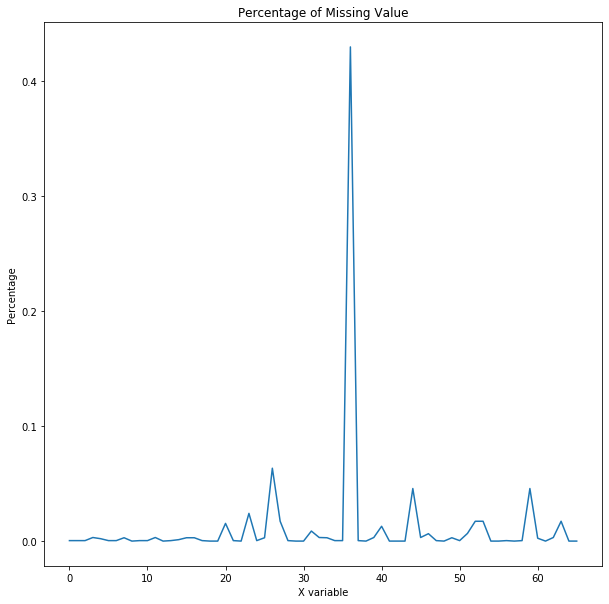

In [9]:
plt.figure(figsize=(10,10))
plt.title('Percentage of Missing Value')
plt.plot(null_for_each.values)
plt.xlabel('X variable')
plt.ylabel('Percentage');

The maximum percentage of missing value is 42% of missing value 

We need to process the missing value issue so that we could do the prediction well

In [10]:
data.drop("X37",axis=1,inplace=True)
data.describe()
data.info()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
count,4816.000000,4816.000000,4816.000000,4803.000000,4.808000e+03,4816.000000,4816.000000,4804.000000,4818.000000,4816.000000,...,4816.000000,4818.000000,4816.000000,4.598000e+03,4806.000000,4818.000000,4803.000000,4735.000000,4818.000000,4818.000000
mean,-0.055232,0.533272,0.188992,4.978602,1.956441e+01,-0.070060,-0.042516,5.739985,1.579277,0.503606,...,0.022793,0.959585,0.273025,1.108795e+03,11.021303,177.494445,9.287631,38.557533,0.063927,3499.858032
std,6.707351,1.202909,1.282430,100.273952,2.384491e+04,7.778523,6.707970,109.508001,1.342723,4.044036,...,7.249022,0.932427,6.338601,7.106563e+04,43.821146,2279.713700,113.225922,588.711967,0.244648,1392.049260
min,-463.890000,0.000000,-72.067000,0.000000,-1.076400e+06,-463.890000,-463.890000,-3.735100,0.000191,-71.444000,...,-468.670000,-0.085920,-184.980000,-1.244000e+01,-0.092493,0.000000,0.000000,-3.726500,0.000000,1071.000000
25%,0.004047,0.254670,0.044923,1.099200,-4.312000e+01,0.000000,0.005985,0.481588,1.015600,0.318990,...,0.015574,0.876940,0.000000,5.298300e+00,4.229925,45.065750,3.074350,2.114850,0.000000,2296.250000
50%,0.046487,0.451495,0.218560,1.642300,3.673450e-01,0.000000,0.056685,1.149000,1.140500,0.522325,...,0.108940,0.950825,0.006320,9.038900e+00,6.176800,73.879500,4.928700,4.077200,0.000000,3500.500000
75%,0.116730,0.662178,0.420153,2.929200,4.986775e+01,0.110470,0.136025,2.781300,1.814050,0.721823,...,0.240262,0.990358,0.206915,1.720750e+01,9.302800,118.597500,8.067850,9.187600,0.000000,4704.750000
max,2.352300,72.416000,28.336000,6845.800000,1.250100e+06,203.150000,2.352300,6868.500000,37.807000,266.860000,...,87.981000,47.788000,308.150000,4.818700e+06,1308.500000,127450.000000,7641.300000,28999.000000,1.000000,5909.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 65 columns):
X1          4816 non-null float64
X2          4816 non-null float64
X3          4816 non-null float64
X4          4803 non-null float64
X5          4808 non-null float64
X6          4816 non-null float64
X7          4816 non-null float64
X8          4804 non-null float64
X9          4818 non-null float64
X10         4816 non-null float64
X11         4816 non-null float64
X12         4803 non-null float64
X13         4818 non-null float64
X14         4816 non-null float64
X15         4812 non-null float64
X16         4804 non-null float64
X17         4804 non-null float64
X18         4816 non-null float64
X19         4818 non-null float64
X20         4818 non-null float64
X21         4744 non-null float64
X22         4816 non-null float64
X23         4818 non-null float64
X24         4702 non-null float64
X25         4816 non-null float64
X26         4804 non-null float64
X27      

In [11]:
from sklearn.model_selection import train_test_split
data = data.drop(columns = ["Id"])
X = data.drop(columns = ["Bankrupt"])
y = data["Bankrupt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


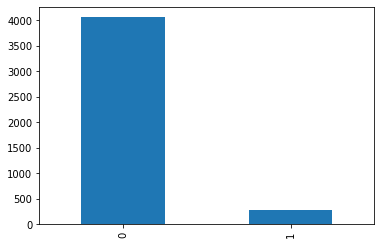

In [12]:
y_train.value_counts().plot(kind = "bar");

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
columns = X_train.columns
   
imputer_uni = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train[columns] = imputer_uni.fit_transform(X_train[columns])
X_test[columns] = imputer_uni.transform(X_test[columns])

/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3513: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pa

In [14]:
imputer = KNNImputer(n_neighbors = 10, weights = "uniform")
train_columns = X_train.columns
X_train[train_columns] = imputer.fit_transform(X_train[train_columns])
test_columns = X_test.columns
X_test[test_columns] = X_test[test_columns]
X_test

/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3513: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3484: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
4340,0.001173,0.672030,0.142270,1.2156,-49.408,0.016824,0.001271,0.48075,1.00740,0.323080,...,19985.00,0.007312,0.003629,0.99269,0.037272,12.3020,4.0442,140.4400,2.5991,8.67450
1221,0.139630,0.250810,0.258480,2.2523,31.714,0.000000,0.182390,2.98710,1.54600,0.749190,...,2443.90,0.124670,0.186370,0.88279,0.044616,11.2790,5.1096,48.7320,7.4899,2.88910
2083,0.147600,0.097863,0.469870,6.4957,59.981,0.003564,0.181560,9.21840,1.44620,0.902140,...,19041.00,0.123660,0.163620,0.87543,0.000000,5.5314,6.8732,21.5780,16.9160,3.25260
1044,0.032618,0.743750,0.052153,1.1584,-49.698,0.111270,0.044782,0.33163,1.05450,0.246650,...,4087.90,0.051681,0.132240,0.94832,1.680600,6.5521,33.0650,59.5240,6.1319,3.26330
2555,0.022155,0.548750,0.540930,2.8668,14.402,0.000000,0.022155,0.82231,0.61232,0.451250,...,4408.80,0.066985,0.049097,0.96466,0.558330,1.1969,2.5829,172.7200,2.1132,3.61640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.033703,0.347710,-0.017419,0.9295,-79.350,0.060703,0.038867,1.57150,1.10140,0.546430,...,-1164.90,0.092075,0.061678,0.90793,0.184180,6.8734,4.4969,151.8900,2.4031,0.77072
93,-0.069876,1.056600,-0.053994,0.9256,-58.467,-0.200500,-0.069876,-0.05359,2.39100,-0.056624,...,-416.79,0.021684,1.234000,0.98272,-5.386800,7.4368,6.8586,110.7900,3.2944,7.28430
17,0.089042,0.359900,0.320390,2.0448,-76.378,0.000000,0.108700,1.77860,1.01110,0.640100,...,3119.40,0.113720,0.139110,0.89471,0.016415,2.0745,11.7390,110.7000,3.2973,2.71120
1569,0.131700,0.159100,0.437230,3.7482,38.115,0.703520,0.163200,5.28530,1.01650,0.840900,...,6078.00,0.151460,0.156620,0.84117,0.000000,2.9363,4.6493,57.1260,6.3893,2.51830


Using KNNImputer to fill the NA values, which is a more appropriate way to better treat with missing value

## X variables Correlation

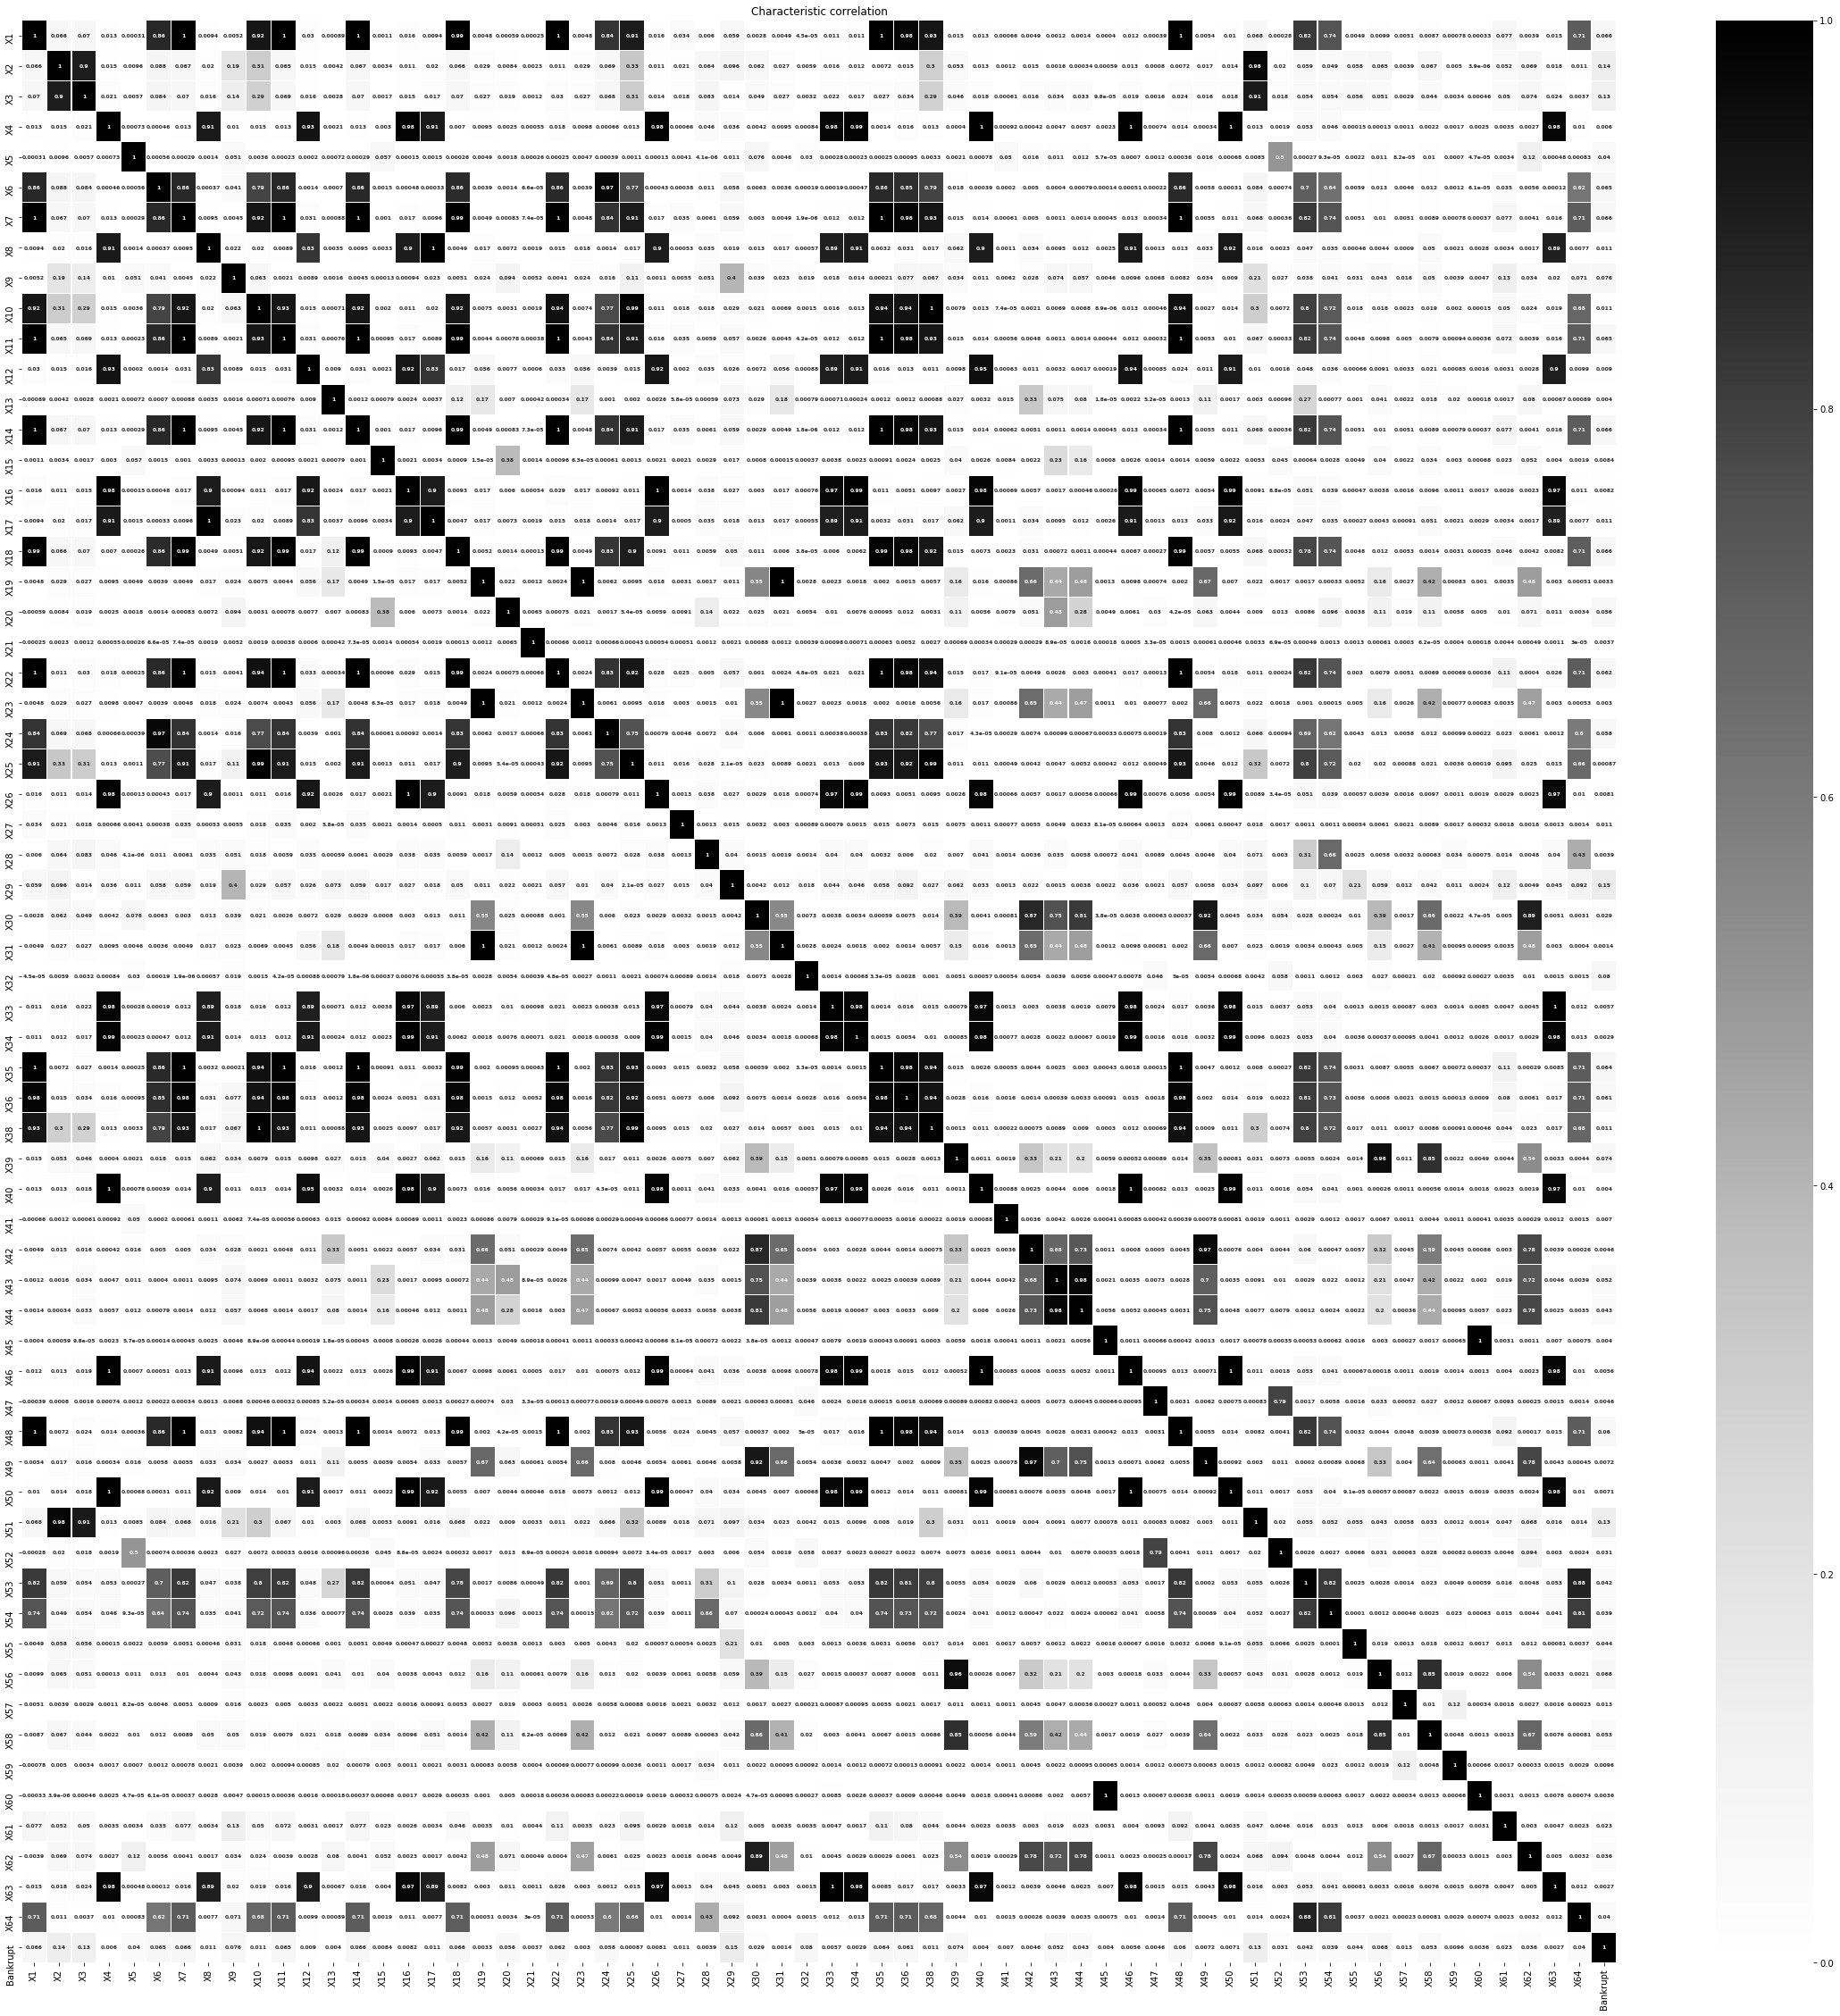

In [15]:
import seaborn as sns
correlations = data.corr() 
correction=abs(correlations)# Only care about the correlation
names = list(data.columns)
fig = plt.figure(figsize=(40,40)) 
ax = fig.add_subplot() 
ax = sns.heatmap(correction,cmap=plt.cm.Greys, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':6,'weight':'bold'})

plt.xticks(np.arange(len(names))+0.5,names) 
plt.yticks(np.arange(len(names))+0.5,names) 

ax.set_title('Characteristic correlation')
plt.show();

## Process imbalanced data

The label of the dataset is highly imbalanced.

Therefore, we should use extra method to deal with the imbalanced issue

we can see that the label is higly imbalanced.


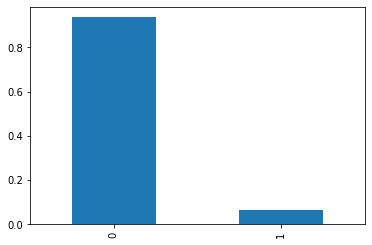

In [16]:
print("we can see that the label is higly imbalanced.")
(data["Bankrupt"].value_counts()/len(data["Bankrupt"])).plot(kind = "bar");

The graph shows that the bank which went bankruptcy has actually significantly lower percentage compared with bank without bankruptcy.

If the degree of class imbalance for the majority class is extreme, then a machine trained classifier may yield high overall prediction accuracy since the model is most likely to predict most samples belonging to the majority class.

Since the size of the dataset is relatively large, then I choose 

In [17]:
def sampling(X_train, y_train):
    class_count_0, class_count_1 = y_train.value_counts()
    # Separate class
    X_class_0 = X_train[y_train == 0]
    X_class_1 = X_train[y_train == 1]
    y_class_0 = y_train[y_train == 0]
    y_class_1 = y_train[y_train == 1]

    X_class_1_over = X_class_1.sample(class_count_0, replace=True)
    y_class_1_over = y_class_1.sample(class_count_0, replace=True)

    X_train_over = pd.concat([X_class_0, X_class_1_over], axis=0)
    y_train_over = pd.concat([y_class_0, y_class_1_over], axis=0)
    return X_train_over, y_train_over
X_train_over, y_train_over = sampling(X_train, y_train)

result of over-sampling method
1    4061
0    4061
Name: Bankrupt, dtype: int64


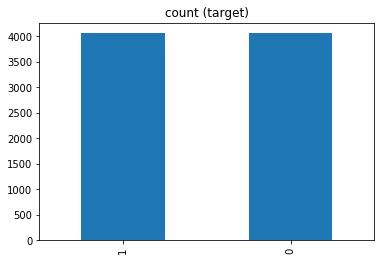

In [18]:
print("result of over-sampling method")
print(y_train_over.value_counts())
y_train_over.value_counts().plot(kind='bar', title='count (target)');

## PCA processing

5 has a cumulative explained variane of: 0.9987513863304597


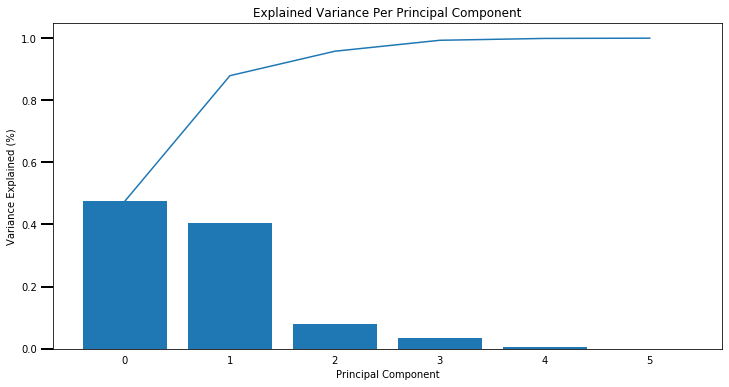

In [19]:
from sklearn.decomposition import PCA
def scree_plot(pca_estimator):

    num_components = len(pca_estimator.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca_estimator.explained_variance_ratio_
 
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    
pca = PCA(n_components = .999)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

scree_plot(pca)

n_components = 5
print(f'{n_components} has a cumulative explained variane of: {sum(pca.explained_variance_ratio_[:n_components])}')

# Implement algorithm

In [20]:
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix, roc_auc_score, roc_curve, auc

In [21]:
def model_pipeline(X_train, X_test, y_train, y_test, input_pipeline, name):
    input_pipeline.fit(X_train, y_train)
    y_train_predict = input_pipeline.predict(X_train)
    
    accuracy_score = sklearn.metrics.accuracy_score(y_train, y_train_predict)
    precision_score = sklearn.metrics.precision_score(y_train, y_train_predict,pos_label = 1,average="binary")
    recall_score = sklearn.metrics.recall_score(y_train, y_train_predict,pos_label = 1,average="binary")
    fbeta_score = sklearn.metrics.fbeta_score(y_train, y_train_predict, beta=2)
    
    print("Model: {m:s} in-sample Accuracy: {a:3.1%}, Recall score: {r:3.1%}, Precision score: {p:3.1%},F-beta: {f:3.1%}"
          .format(m=name, a=accuracy_score, r=recall_score, p=precision_score, f=fbeta_score))
    
    y_test_predict = input_pipeline.predict(X_test)

    accuracy_out = sklearn.metrics.accuracy_score(y_test, y_test_predict)
    precision_out = sklearn.metrics.precision_score(y_test, y_test_predict,pos_label = 1,average="binary")
    recall_out = sklearn.metrics.recall_score(y_test, y_test_predict,pos_label = 1,average="binary")
    fbeta_out = sklearn.metrics.fbeta_score(y_test, y_test_predict, beta=2)
    
    print("Model: {m:s} out-of-sample Accuracy: {a:3.1%}, Recall score: {r:3.1%}, Precision score: {p:3.1%},F-beta: {f:3.1%}\
          ".format(m=name, a=accuracy_out, r=recall_out, p=precision_out,f=fbeta_out))
    return input_pipeline
    

## Naive Bayes

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
name = 'Naive Bayes'
clf_nb = GaussianNB()
pipeline_nb = Pipeline([("scaler", scaler), ("model", clf_nb)])

pipeline_nb = model_pipeline(X_train, X_test, y_train, y_test, pipeline_nb, name)

Model: Naive Bayes in-sample Accuracy: 15.6%, Recall score: 95.6%, Precision score: 6.7%,F-beta: 26.3%
Model: Naive Bayes out-of-sample Accuracy: 18.3%, Recall score: 93.9%, Precision score: 7.3%,F-beta: 27.9%          


In [24]:
name = 'Naive Bayes'
clf_nb = GaussianNB()
pca = PCA(n_components=5)
pipeline_nb = Pipeline([("scaler", scaler),("PCA",pca) ,("model", clf_nb)])

pipeline_nb = model_pipeline(X_train, X_test, y_train, y_test, pipeline_nb, name)

Model: Naive Bayes in-sample Accuracy: 93.5%, Recall score: 7.3%, Precision score: 41.7%,F-beta: 8.7%
Model: Naive Bayes out-of-sample Accuracy: 93.4%, Recall score: 9.1%, Precision score: 60.0%,F-beta: 10.9%          


In [25]:
name = 'Naive Bayes'
clf_nb = GaussianNB()
pipeline_nb = Pipeline([("scaler", scaler), ("model", clf_nb)])

pipeline_nb = model_pipeline(X_train_over, X_test, y_train_over, y_test, pipeline_nb, name)

Model: Naive Bayes in-sample Accuracy: 52.8%, Recall score: 96.2%, Precision score: 51.5%,F-beta: 81.9%
Model: Naive Bayes out-of-sample Accuracy: 18.3%, Recall score: 97.0%, Precision score: 7.5%,F-beta: 28.7%          


Even though the recall score is relatively high, but f1 score are pretty low. 

Therefore, Naive Bayes is not accepted.

## logistics regression

In [26]:
name = 'Logistic'
clf_logistic = LogisticRegression(solver='liblinear',max_iter=100)
pipeline_logistic = Pipeline([
    ("scaler", scaler), 
    ("model", clf_logistic)
])
pipeline_logistic = model_pipeline(X_train, X_test, y_train, y_test, pipeline_logistic, name)

Model: Logistic in-sample Accuracy: 93.9%, Recall score: 11.6%, Precision score: 61.5%,F-beta: 13.9%
Model: Logistic out-of-sample Accuracy: 93.2%, Recall score: 12.1%, Precision score: 50.0%,F-beta: 14.3%          


In [27]:
clf_logistic = LogisticRegression(solver='liblinear',max_iter=100,class_weight='balanced')
pipeline_logistic = Pipeline([
    ("scaler", scaler), 
    ("model", clf_logistic)
])
pipeline_logistic = model_pipeline(X_train, X_test, y_train, y_test, pipeline_logistic, name)

Model: Logistic in-sample Accuracy: 82.4%, Recall score: 76.7%, Precision score: 23.2%,F-beta: 52.5%
Model: Logistic out-of-sample Accuracy: 79.3%, Recall score: 72.7%, Precision score: 20.9%,F-beta: 48.6%          


In [28]:
clf_logistic = LogisticRegression(solver='liblinear',max_iter=100,class_weight='balanced',C=0.01)
pipeline_logistic = Pipeline([
    ("scaler", scaler), 
    ("model", clf_logistic)
])
pipeline_logistic = model_pipeline(X_train, X_test, y_train, y_test, pipeline_logistic, name)

Model: Logistic in-sample Accuracy: 81.7%, Recall score: 74.9%, Precision score: 22.1%,F-beta: 50.7%
Model: Logistic out-of-sample Accuracy: 77.2%, Recall score: 69.7%, Precision score: 18.7%,F-beta: 45.1%          


In [29]:
clf_logistic = LogisticRegression(solver='liblinear',max_iter=100,class_weight='balanced',C=0.01)
pca = PCA(n_components=5)
pipeline_logistic = Pipeline([
    ("scaler", scaler),
    ("PCA",pca),
    ("model", clf_logistic)
])
pipeline_logistic = model_pipeline(X_train, X_test, y_train, y_test, pipeline_logistic, name)

Model: Logistic in-sample Accuracy: 80.9%, Recall score: 66.2%, Precision score: 19.8%,F-beta: 45.1%
Model: Logistic out-of-sample Accuracy: 80.9%, Recall score: 60.6%, Precision score: 20.2%,F-beta: 43.3%          


In [30]:
clf_logistic = LogisticRegression(solver='liblinear',max_iter=100,class_weight='balanced', C=0.01)
pipeline_logistic = Pipeline([
    ("scaler", scaler), 
    ("model", clf_logistic)
])
pipeline_logistic = model_pipeline(X_train_over, X_test, y_train_over, y_test, pipeline_logistic, name)

Model: Logistic in-sample Accuracy: 77.4%, Recall score: 71.7%, Precision score: 81.0%,F-beta: 73.4%
Model: Logistic out-of-sample Accuracy: 79.3%, Recall score: 69.7%, Precision score: 20.4%,F-beta: 46.9%          


From the above statistics, we can see that model testing on balanced dataset has the highest f-beta score.

## Decision Trees

In [31]:
name = 'decision_tree'
clf_dt = DecisionTreeClassifier(random_state=42)
pipeline_dt = Pipeline([
    ("scaler", scaler), 
    ("model", clf_dt)
])
pipeline_dt = model_pipeline(X_train, X_test, y_train, y_test, pipeline_dt, name)


Model: decision_tree in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: decision_tree out-of-sample Accuracy: 91.9%, Recall score: 51.5%, Precision score: 42.5%,F-beta: 49.4%          


In [32]:
clf_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
pipeline_dt = Pipeline([
    ("scaler", scaler), 
    ("model", clf_dt)
])
pipeline_dt = model_pipeline(X_train, X_test, y_train, y_test, pipeline_dt, name)

Model: decision_tree in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: decision_tree out-of-sample Accuracy: 91.9%, Recall score: 36.4%, Precision score: 40.0%,F-beta: 37.0%          


In [33]:
clf_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
pca = PCA(n_components=5)
pipeline_dt = Pipeline([
    ("scaler", scaler), 
    ("PCA",pca),
    ("model", clf_dt)
])
pipeline_dt = model_pipeline(X_train, X_test, y_train, y_test, pipeline_dt, name)

Model: decision_tree in-sample Accuracy: 99.8%, Recall score: 97.8%, Precision score: 99.6%,F-beta: 98.2%
Model: decision_tree out-of-sample Accuracy: 89.2%, Recall score: 15.2%, Precision score: 17.2%,F-beta: 15.5%          


In [34]:
clf_dt = DecisionTreeClassifier(random_state=42)
pipeline_dt = Pipeline([
    ("scaler", scaler), 
    ("model", clf_dt)
])
pipeline_dt = model_pipeline(X_train_over, X_test, y_train_over, y_test, pipeline_dt, name)

Model: decision_tree in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: decision_tree out-of-sample Accuracy: 92.9%, Recall score: 39.4%, Precision score: 48.1%,F-beta: 40.9%          


In [35]:
clf_dt = DecisionTreeClassifier(random_state=42)
pca = PCA(n_components=5)
pipeline_dt = Pipeline([
    ("scaler", scaler), 
    ("PCA",pca),
    ("model", clf_dt)
])
pipeline_dt = model_pipeline(X_train_over, X_test, y_train_over, y_test, pipeline_dt, name)

Model: decision_tree in-sample Accuracy: 99.0%, Recall score: 98.0%, Precision score: 99.9%,F-beta: 98.4%
Model: decision_tree out-of-sample Accuracy: 90.5%, Recall score: 21.2%, Precision score: 25.9%,F-beta: 22.0%          


## KNN

In [36]:
name = "KNN"
KNN_clf = KNeighborsClassifier(algorithm='auto')
KNN_pipeline = Pipeline([
    ("scaler",scaler), 
    ("KNN", KNN_clf)
])
pipeline_KNN = model_pipeline(X_train, X_test, y_train, y_test, KNN_pipeline, name)


Model: KNN in-sample Accuracy: 94.6%, Recall score: 24.7%, Precision score: 73.1%,F-beta: 28.5%
Model: KNN out-of-sample Accuracy: 93.2%, Recall score: 12.1%, Precision score: 50.0%,F-beta: 14.3%          


In [37]:
name = "KNN"
KNN_clf = KNeighborsClassifier(algorithm='auto')
pca = PCA(n_components = 5)
KNN_pipeline = Pipeline([
    ("scaler",scaler), 
    ("PCA",pca),
    ("KNN", KNN_clf)
])
pipeline_KNN = model_pipeline(X_train, X_test, y_train, y_test, KNN_pipeline, name)


Model: KNN in-sample Accuracy: 94.3%, Recall score: 24.0%, Precision score: 63.5%,F-beta: 27.4%
Model: KNN out-of-sample Accuracy: 92.1%, Recall score: 12.1%, Precision score: 30.8%,F-beta: 13.8%          


In [38]:
name = "KNN"
KNN_clf = KNeighborsClassifier(algorithm='auto')
KNN_pipeline = Pipeline([
    ("scaler",scaler), 
    ("KNN", KNN_clf)
])
pipeline_KNN = model_pipeline(X_train_over, X_test, y_train_over, y_test, KNN_pipeline, name)


Model: KNN in-sample Accuracy: 96.1%, Recall score: 100.0%, Precision score: 92.7%,F-beta: 98.5%
Model: KNN out-of-sample Accuracy: 85.7%, Recall score: 36.4%, Precision score: 20.0%,F-beta: 31.2%          


In [39]:
name = "KNN"
KNN_clf = KNeighborsClassifier(algorithm='auto')
pca = PCA(n_components = 5)
KNN_pipeline = Pipeline([
    ("scaler",scaler), 
    ("PCA",pca),
    ("KNN", KNN_clf)
])
pipeline_KNN = model_pipeline(X_train_over, X_test, y_train_over, y_test, KNN_pipeline, name)


Model: KNN in-sample Accuracy: 95.1%, Recall score: 100.0%, Precision score: 91.1%,F-beta: 98.1%
Model: KNN out-of-sample Accuracy: 83.6%, Recall score: 42.4%, Precision score: 18.9%,F-beta: 34.0%          


## Random Forest

In [40]:
name = "Random Forest"
RF_clf = RandomForestClassifier()
RF_pipeline=Pipeline([
    ("scaler",scaler), 
    ("Random Forest", RF_clf)
])
pipeline_RF = model_pipeline(X_train, X_test, y_train, y_test, RF_pipeline, name)


Model: Random Forest in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: Random Forest out-of-sample Accuracy: 94.8%, Recall score: 30.3%, Precision score: 83.3%,F-beta: 34.7%          


In [41]:
RF_clf = RandomForestClassifier(class_weight = "balanced")
RF_pipeline=Pipeline([
    ("scaler",scaler), 
    ("Random Forest", RF_clf)
])
pipeline_RF = model_pipeline(X_train, X_test, y_train, y_test, RF_pipeline, name)


Model: Random Forest in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: Random Forest out-of-sample Accuracy: 93.4%, Recall score: 12.1%, Precision score: 57.1%,F-beta: 14.4%          


In [42]:
RF_clf = RandomForestClassifier(class_weight = "balanced")
pca = PCA(n_components = 5)
RF_pipeline=Pipeline([
    ("scaler",scaler),
    ("PCA",pca),
    ("Random Forest", RF_clf)
])
pipeline_RF = model_pipeline(X_train, X_test, y_train, y_test, RF_pipeline, name)


Model: Random Forest in-sample Accuracy: 99.9%, Recall score: 98.9%, Precision score: 100.0%,F-beta: 99.1%
Model: Random Forest out-of-sample Accuracy: 92.9%, Recall score: 12.1%, Precision score: 44.4%,F-beta: 14.2%          


In [43]:
RF_clf = RandomForestClassifier()
RF_pipeline=Pipeline([
    ("scaler",scaler), 
    ("Random Forest", RF_clf)
])
pipeline_RF = model_pipeline(X_train_over, X_test, y_train_over, y_test, RF_pipeline, name)


Model: Random Forest in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: Random Forest out-of-sample Accuracy: 92.7%, Recall score: 21.2%, Precision score: 43.8%,F-beta: 23.6%          


In [44]:
RF_clf = RandomForestClassifier(class_weight = "balanced")
RF_pipeline=Pipeline([
    ("scaler",scaler), 
    ("Random Forest", RF_clf)
])
pipeline_RF = model_pipeline(X_train_over, X_test, y_train_over, y_test, RF_pipeline, name)


Model: Random Forest in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: Random Forest out-of-sample Accuracy: 93.2%, Recall score: 24.2%, Precision score: 50.0%,F-beta: 27.0%          


In [45]:
RF_clf = RandomForestClassifier(class_weight = "balanced")
pca = PCA(n_components = 5)
RF_pipeline=Pipeline([
    ("scaler",scaler), 
    ("PCA",pca),
    ("Random Forest", RF_clf)
])
pipeline_RF = model_pipeline(X_train_over, X_test, y_train_over, y_test, RF_pipeline, name)


Model: Random Forest in-sample Accuracy: 100.0%, Recall score: 100.0%, Precision score: 100.0%,F-beta: 100.0%
Model: Random Forest out-of-sample Accuracy: 91.5%, Recall score: 6.1%, Precision score: 16.7%,F-beta: 6.9%          


## SVM

In [46]:
name = "SVM"
SVM_clf = SVC(class_weight = "balanced")
SVM_pipeline=Pipeline(
    [("scaler",scaler), 
     ("SVM", SVM_clf)
])
pipeline_SVM = model_pipeline(X_train, X_test, y_train, y_test, SVM_pipeline, name)

Model: SVM in-sample Accuracy: 84.9%, Recall score: 73.5%, Precision score: 25.8%,F-beta: 53.7%
Model: SVM out-of-sample Accuracy: 81.3%, Recall score: 57.6%, Precision score: 20.0%,F-beta: 41.9%          


In [47]:
name = "SVM"
SVM_clf = SVC(class_weight = "balanced")
pca = PCA(n_components = 5)
SVM_pipeline=Pipeline(
    [("scaler",scaler), 
     ("PCA",pca),
     ("SVM", SVM_clf)
])
pipeline_SVM = model_pipeline(X_train, X_test, y_train, y_test, SVM_pipeline, name)

Model: SVM in-sample Accuracy: 81.5%, Recall score: 70.9%, Precision score: 21.2%,F-beta: 48.3%
Model: SVM out-of-sample Accuracy: 81.5%, Recall score: 66.7%, Precision score: 22.0%,F-beta: 47.4%          


In [48]:
name = "SVM"
SVM_clf = SVC(class_weight = "balanced")
SVM_pipeline=Pipeline(
    [("scaler",scaler), 
     ("SVM", SVM_clf)
])
pipeline_SVM = model_pipeline(X_train_over, X_test, y_train_over, y_test, SVM_pipeline, name)

Model: SVM in-sample Accuracy: 80.4%, Recall score: 74.6%, Precision score: 84.4%,F-beta: 76.4%
Model: SVM out-of-sample Accuracy: 80.3%, Recall score: 60.6%, Precision score: 19.6%,F-beta: 42.7%          


In [49]:
name = "SVM"
SVM_clf = SVC(class_weight = "balanced")
pca = PCA(n_components = 5)
SVM_pipeline=Pipeline(
    [("scaler",scaler), 
     ("PCA",pca),
     ("SVM", SVM_clf)
])
pipeline_SVM = model_pipeline(X_train_over, X_test, y_train_over, y_test, SVM_pipeline, name)

Model: SVM in-sample Accuracy: 74.3%, Recall score: 62.1%, Precision score: 82.2%,F-beta: 65.3%
Model: SVM out-of-sample Accuracy: 84.0%, Recall score: 60.6%, Precision score: 23.8%,F-beta: 46.3%          


## Adaboost

In [50]:
name = "Adaboost"
ABC_clf = AdaBoostClassifier()
ABC_pipeline = Pipeline([
    ("scaler",scaler),
    ("Adaboost", ABC_clf)
])
pipeline_SVM = model_pipeline(X_train, X_test, y_train, y_test, ABC_pipeline, name)

Model: Adaboost in-sample Accuracy: 96.7%, Recall score: 56.7%, Precision score: 85.7%,F-beta: 60.8%
Model: Adaboost out-of-sample Accuracy: 95.2%, Recall score: 42.4%, Precision score: 77.8%,F-beta: 46.7%          


In [51]:
ABC_clf = AdaBoostClassifier()
ABC_pipeline = Pipeline([
    ("scaler",scaler),
    ("Adaboost", ABC_clf)
])
pipeline_SVM = model_pipeline(X_train_over, X_test, y_train_over, y_test, ABC_pipeline, name)

Model: Adaboost in-sample Accuracy: 91.7%, Recall score: 91.4%, Precision score: 91.9%,F-beta: 91.5%
Model: Adaboost out-of-sample Accuracy: 87.1%, Recall score: 57.6%, Precision score: 28.4%,F-beta: 47.7%          


In [52]:
ABC_clf = AdaBoostClassifier()
pca =PCA(n_components = 5)
ABC_pipeline = Pipeline([
    ("scaler",scaler),
    ("PCA",pca),
    ("Adaboost", ABC_clf)
])
pipeline_SVM = model_pipeline(X_train_over, X_test, y_train_over, y_test, ABC_pipeline, name)

Model: Adaboost in-sample Accuracy: 78.6%, Recall score: 74.9%, Precision score: 80.8%,F-beta: 76.0%
Model: Adaboost out-of-sample Accuracy: 79.3%, Recall score: 57.6%, Precision score: 18.1%,F-beta: 40.1%          


## GradientBoost

In [53]:
name = "GBM"
GBM_clf = GradientBoostingClassifier()
GBM_pipeline = Pipeline([
    ("scaler",scaler),
    ("GBM", GBM_clf)
])
pipeline_GBM = model_pipeline(X_train, X_test, y_train, y_test, GBM_pipeline, name)

Model: GBM in-sample Accuracy: 98.6%, Recall score: 77.5%, Precision score: 100.0%,F-beta: 81.1%
Model: GBM out-of-sample Accuracy: 95.9%, Recall score: 45.5%, Precision score: 88.2%,F-beta: 50.3%          


In [54]:
GBM_clf = GradientBoostingClassifier()
GBM_pipeline = Pipeline([
    ("scaler",scaler),
    ("GBM", GBM_clf)
])
pipeline_GBM = model_pipeline(X_train_over, X_test, y_train_over, y_test, GBM_pipeline, name)

Model: GBM in-sample Accuracy: 97.5%, Recall score: 98.6%, Precision score: 96.4%,F-beta: 98.2%
Model: GBM out-of-sample Accuracy: 92.9%, Recall score: 63.6%, Precision score: 48.8%,F-beta: 60.0%          


In [55]:
GBM_clf = GradientBoostingClassifier()
pca = PCA(n_components = 5)
GBM_pipeline = Pipeline([
    ("scaler",scaler),
    ("PCA",pca),
    ("GBM", GBM_clf)
])
pipeline_GBM = model_pipeline(X_train_over, X_test, y_train_over, y_test, GBM_pipeline, name)

Model: GBM in-sample Accuracy: 88.9%, Recall score: 92.9%, Precision score: 86.1%,F-beta: 91.4%
Model: GBM out-of-sample Accuracy: 82.6%, Recall score: 48.5%, Precision score: 19.3%,F-beta: 37.2%          


## MLP

In [56]:
MLP_clf = MLPClassifier()
MLP_pipeline = Pipeline([
    ("scaler",scaler),
    ("MLP", MLP_clf)
])
pipeline_GBM = model_pipeline(X_train, X_test, y_train, y_test, MLP_pipeline, name)

Model: GBM in-sample Accuracy: 96.5%, Recall score: 47.3%, Precision score: 95.6%,F-beta: 52.6%
Model: GBM out-of-sample Accuracy: 93.4%, Recall score: 21.2%, Precision score: 53.8%,F-beta: 24.1%          


/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
MLP_clf = MLPClassifier()
MLP_pipeline = Pipeline([
    ("scaler",scaler),
    ("MLP", MLP_clf)
])
pipeline_GBM = model_pipeline(X_train_over, X_test, y_train_over, y_test, MLP_pipeline, name)

Model: GBM in-sample Accuracy: 97.9%, Recall score: 98.3%, Precision score: 97.5%,F-beta: 98.2%
Model: GBM out-of-sample Accuracy: 90.0%, Recall score: 57.6%, Precision score: 35.8%,F-beta: 51.4%          


/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


We can find that RandomForest, Adaboost, GradientBoost and MLP have better performance. 

Then I will use Voting classifier to create a complex pipeline.

## Voting Classifier

In [58]:

clf1 = RandomForestClassifier()
clf2 = AdaBoostClassifier()
clf3 = MLPClassifier(alpha=1, max_iter=1000)
clf4 = GradientBoostingClassifier(n_estimators=100)

name = 'VotingClassifier'
together = VotingClassifier(estimators=
                        [
                         ('clf1', clf1),
                         ('clf2', clf2), 
                         ('clf3', clf3),
                         ('clf4', clf4)],                        
                        weights=[1,1,2,5],
                        voting='hard') 

voting_pipeline = Pipeline([ 
        ("scaler", scaler), 
        ("model", together)
    ])
voting_pipeline = model_pipeline(X_train, X_test, y_train, y_test, voting_pipeline, name)

Model: VotingClassifier in-sample Accuracy: 98.6%, Recall score: 77.5%, Precision score: 100.0%,F-beta: 81.1%
Model: VotingClassifier out-of-sample Accuracy: 96.1%, Recall score: 48.5%, Precision score: 88.9%,F-beta: 53.3%          


## Error analysis

In [59]:
y_test_pred = voting_pipeline.predict(X_test)

mistake_predict = y_test_pred != y_test
result = X_test.copy()
result['y_real'] = y_test
result['y_pred'] = y_test_pred
result.loc[mistake_predict]
print("the data that are mispredicted")

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,y_real,y_pred
3081,0.028770,0.588240,0.218900,1.48030,-56.0740,0.000000,0.028770,0.699980,0.98627,0.411760,...,0.069870,0.95147,0.000000,2.609000,3.4109,168.6600,2.164100,3.03130,1,0
465,-0.456220,0.961200,-0.571370,0.36061,-162.3500,-2.382200,-0.456220,0.040371,1.26770,0.038805,...,-11.757000,1.35290,0.000000,7.840400,9.6676,257.2900,1.418600,1.87050,0,1
3424,-0.092924,0.083884,0.434580,6.18070,32.9990,0.000000,-0.092924,10.921000,3.82920,0.916120,...,-0.101430,1.02960,0.000000,51.735000,9.5004,7.9957,45.649000,7.95210,1,0
1448,0.112960,0.611130,0.276980,1.47860,40.7220,0.000000,0.140200,0.636240,2.17740,0.388830,...,0.290510,0.86339,0.000000,50.177000,4.6912,97.0160,3.762300,15.09700,1,0
1126,0.194540,0.558300,0.281430,1.58800,5.1795,0.194540,0.242840,0.767590,1.05600,0.428550,...,0.453940,0.94694,0.185940,20.295000,14.5280,39.3010,9.287300,18.52500,1,0
2706,0.018991,0.486210,0.510350,2.13540,32.6130,0.000000,0.026944,1.056700,3.38240,0.513790,...,0.036962,0.99214,0.027089,19.852000,12.7320,48.5050,7.524900,84.24800,1,0
1893,0.093260,0.131310,0.264650,3.01550,72.0980,0.093260,0.089028,6.223700,1.03480,0.817220,...,0.114120,0.96637,0.000000,83.616000,6.6616,36.1150,10.107000,2.19700,1,0
4525,-0.240850,1.017600,-0.171260,0.82642,-123.4500,-0.508910,-0.240850,-0.017269,1.15400,-0.017572,...,13.706000,1.17720,0.000000,9.898900,2.1967,312.0500,1.169700,6.24960,1,0
1729,0.059045,0.339000,0.180410,2.15560,16.0720,0.000000,0.073548,1.949800,3.36750,0.661000,...,0.089327,0.97725,0.010979,96.038000,18.1500,16.9210,21.571000,5.07560,1,0
4155,0.118540,0.519460,0.376420,1.96150,-80.0580,0.000000,0.118540,0.925060,1.17810,0.480540,...,0.246670,0.88039,0.259280,1.962500,7.1645,121.3000,3.009000,5.08030,1,0


the data that are mispredicted


### Grid Search

Try to find out the optimal max_depth and max_iteration for the classification

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

ftwo_scorer = make_scorer(fbeta_score, beta=2)

params = {
    'clf1__max_depth': [3,5,7],
    'clf3__max_iter': [1000,2000,3000]
         }
grid_clf_pipeline = Pipeline([ 
        ("scaler", scaler), 
        ("model", GridSearchCV(estimator=together, param_grid=params,cv = 5, scoring=ftwo_scorer))
    ])
grid_clf_pipeline = model_pipeline(X_train, X_test, y_train, y_test, grid_clf_pipeline, name)

Model: VotingClassifier in-sample Accuracy: 98.6%, Recall score: 77.5%, Precision score: 100.0%,F-beta: 81.1%
Model: VotingClassifier out-of-sample Accuracy: 95.9%, Recall score: 45.5%, Precision score: 88.2%,F-beta: 50.3%          


In [61]:
X_all = X

final_imputer_uni = SimpleImputer(missing_values=np.nan, strategy='mean')
X_all[X_all.columns] = final_imputer_uni.fit_transform(X_all[X_all.columns])

final_imputer_multi = KNNImputer(n_neighbors=10, weights="uniform")
X_all[X_all.columns] = final_imputer_multi.fit_transform(X_all[X_all.columns])

#X_all_over, y_over = sampling(X_all, y)


## model
clf1 = RandomForestClassifier(max_depth = list(grid_clf_pipeline['model'].best_params_.values())[0])
clf2 = AdaBoostClassifier()
clf3 = MLPClassifier(alpha=1, max_iter=list(grid_clf_pipeline['model'].best_params_.values())[1])
clf4 = GradientBoostingClassifier(n_estimators=100)

name = 'VotingClassifier'
together = VotingClassifier(estimators=
                        [
                         ('clf1', clf1),
                         ('clf2', clf2), 
                         ('clf3', clf3),
                         ('clf4', clf4)],                        
                        weights=[1,1,2,5],
                        voting='hard') 

final_pipeline = Pipeline([ 
        ("scaler", scaler), 
        ("model", together)
    ])

final_pipeline.fit(X_all, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('clf1',
                                               RandomForestClassifier(max_depth=5)),
                                              ('clf2', AdaBoostClassifier()),
                                              ('clf3',
                                               MLPClassifier(alpha=1,
                                                             max_iter=3000)),
                                              ('clf4',
                                               GradientBoostingClassifier())],
                                  weights=[1, 1, 2, 5]))])

In [62]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.
So choose one (explain why !) and do the following.

- You will implement the body of a subroutine `MyModel`
    - That takes as argument a Pandas DataFrame 
        - Each row is an example on which to predict
        - The features of the example are elements of the row
    - Performs predictions on each example
    - Returns an array or predictions with a one-to-one correspondence with the examples in the test set
    

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

In [63]:

import pandas as pd
import os
name = "CLF_class"

def MyModel(X):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    X = X.drop(columns=['Id'])
    X = X.drop(columns=['X37'])
    for col in X:
        X[col]=pd.to_numeric(X[col], errors='coerce')
    #X[X.columns] = final_imputer_uni.transform(X[X.columns])
    X[X.columns] = final_imputer_multi.transform(X[X.columns])
    
    
    predictions = final_pipeline.predict(X)
    return predictions

y_hold_pred = MyModel(holdout_data)

accuracy_hold = accuracy_score(y_hold, y_hold_pred)
recall_hold = recall_score(y_hold, y_hold_pred, pos_label=1, average="binary")
precision_hold = precision_score(y_hold, y_hold_pred, pos_label=1, average="binary")


NameError: name 'y_hold' is not defined

In [74]:
X_hold = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )
y_hold_pred = MyModel(X_hold)
y_hold_pred

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
accuracy_hold = accuracy_score(y_hold, y_hold_pred)
recall_hold = recall_score(y_hold, y_hold_pred, pos_label=1, average="binary")
precision_hold = precision_score(y_hold, y_hold_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_hold,
                                                                            r=recall_hold,
                                                                            p=precision_hold
                                                                            )
         )

NameError: name 'y_hold' is not defined

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

The following cell
- Assumes that you have created `X_test, y_test` as your proxy for an out of sample dataset
    - It serves the same function as `X_hold`, the holdout dataset, but you have the associated target (only the instructors have `y_hold`)

In [90]:
from sklearn.utils import shuffle
data = pd.read_csv( os.path.join(DATA_DIR, "holdout", "5th_yr_with_target.csv") )

X = data.drop(["Bankrupt"], axis=1)
y = data["Bankrupt"]
y, X = sklearn.utils.shuffle(y, X,random_state = 42)

X_check_train, X_check_test, y_check_train, y_check_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [91]:
name = "self-created classification calss to predict bankruptcy"
y_test_pred = MyModel(X_check_test)
y_test= y_check_test
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test, y_test_pred, pos_label=1, average="binary")
print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

	self-created classification calss to predict bankruptcy Accuracy: 95.4%, Recall 40.0%, Precision 85.7%
